(c_features)=

---------------
```{admonition} Learning Objectives
* Differentiate between raster and vector data.
* Understand and create dictionary data structures to form the basis of a GeoDataFrame.
* Identify data measurement level categories.
```
--------------


# Spatial Data

## Vector vs. Raster Data

To work in a GIS environment, real world observations (objects or events that can be recorded in 2D or 3D space) need to be reduced to spatial entities. These spatial entities can be represented in a GIS as a **vector data model** or a **raster data model**. 

```{figure} ../_static/img/vector_vs_raster.jpg
:name: raster_vs_vector
:alt: Vector and raster representations of a river feature.
 Vector and raster representations of a river feature.
```

### Vector Data

Vector features can be decomposed into three different geometric primitives: **points**, **polylines** and **polygons**. 

For each of these examples, we'll be using a Python dictionary to form the basis of a GeoDataFrame. A dictionary in Python is a data structure that allows you to store data as pairs of keys and values. For more information, you can refer to the [Python documentation on dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). 

#### Point
 
In this example, we're using the `geopandas` and `shapely` libraries to create a GeoDataFrame that contains point data. Try copying and running this code snippet below to demonstrate.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

d = {'name': ['Washington\n(38.90, -77.03)', 'Baltimore\n(39.29, -76.61)','Fredrick\n(39.41,-77.40)'], 
     'geometry': [Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)]}

gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
print(gdf)

                          name                    geometry
0  Washington\n(38.90, -77.03)  POINT (-77.03687 38.90719)
1   Baltimore\n(39.29, -76.61)  POINT (-76.61219 39.29039)
2     Fredrick\n(39.41,-77.40)  POINT (-77.40846 39.41201)


A [point](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html) is composed of one coordinate pair representing a specific location in a coordinate system. Points are the most basic geometric primitives having no length or area. By definition a point can't be “seen” since it has no area; but this is not practical if such primitives are to be mapped. So points on a map are represented using *symbols* that have both area and shape (e.g. circle, square, plus signs).

In the following code snippet, we're using `matplotlib` to plot our [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame). Try copying and running the code to see the visual representation.

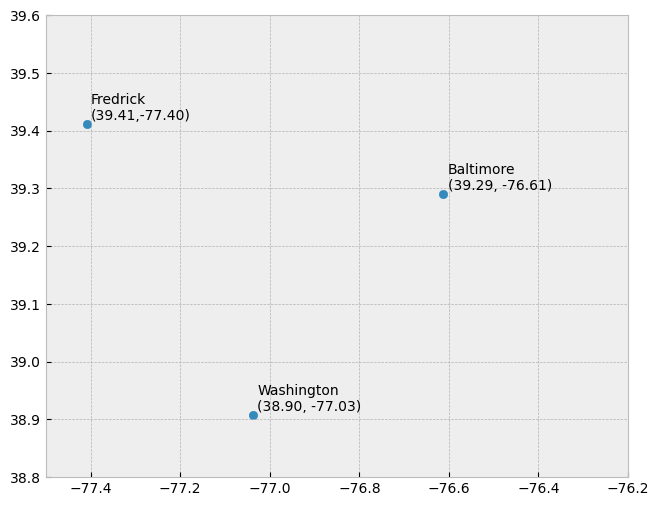

In [2]:
plt.style.use('bmh') # better for plotting geometries vs general plots.

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.ylim([38.8, 39.6])
plt.xlim([-77.5, -76.2])

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.show()

We seem capable of interpreting such symbols as points, but there may be instances when such interpretation may be ambiguous (e.g. is a round symbol delineating the area of a round feature on the ground such as a large oil storage tank or is it representing the point location of that tank?).

#### Line String

In the following example, we're creating a [LineString](https://shapely.readthedocs.io/en/stable/reference/shapely.LineString.html), which is composed of a sequence of two or more coordinate pairs called vertices. A vertex is defined by coordinate pairs, just like a point, but what differentiates a vertex from a point is its explicitly defined relationship with neighboring vertices. A vertex is connected to at least one other vertex.

Try copying and running this code snippet below to demonstrate creating a polyline using the Python libraries shapely and geopandas. This code also uses matplotlib's pyplot module to plot the data.

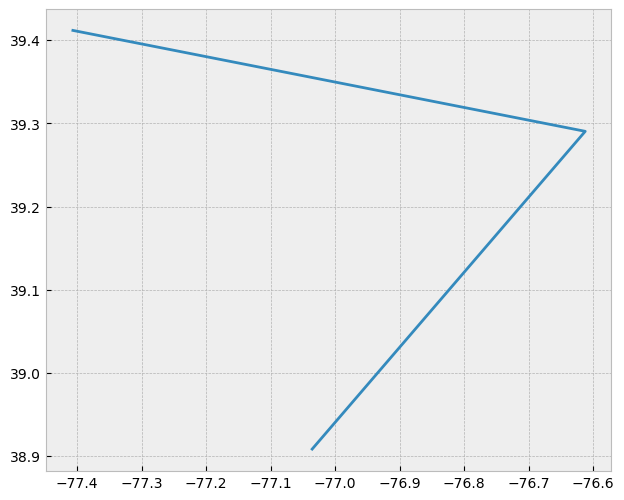

In [3]:
# Import required modules
from shapely.geometry import LineString, Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Define a dictionary with names and geometry (LineString)
d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}

# Create a GeoDataFrame using the dictionary
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.show()

 
Like a point, a true line can't be seen since it has no area. And like a point, a line is symbolized using shapes that have a color, width and style (e.g. solid, dashed, dotted, etc...). Roads and rivers are commonly stored as polylines in a GIS.

#### Polygon

A [polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html), in geographic information systems (GIS), is an area defined by three or more line segments, each with a starting and ending pair of coordinates that match. The terms lattice or area might be used interchangeably with 'polygon'. A polygon's defining features include its length (i.e., the perimeter), its area, and the concept of an interior and exterior. Specifically in GIS, the enclosed area of a polygon is explicitly defined.

If an enclosed area is not defined, you're dealing with a polyline feature rather than a polygon. To better understand this, consider a triangle formed by three connected lines. These could either represent three connected road segments, illustrating a polyline feature, or the grassy region enclosed by these roads. In the latter case, an 'interior' area is implied, and so it would be a polygon.

In the following example, we use the libraries Shapely and GeoPandas to create a polygon. It is formed by three line segments with matching start and end coordinates.

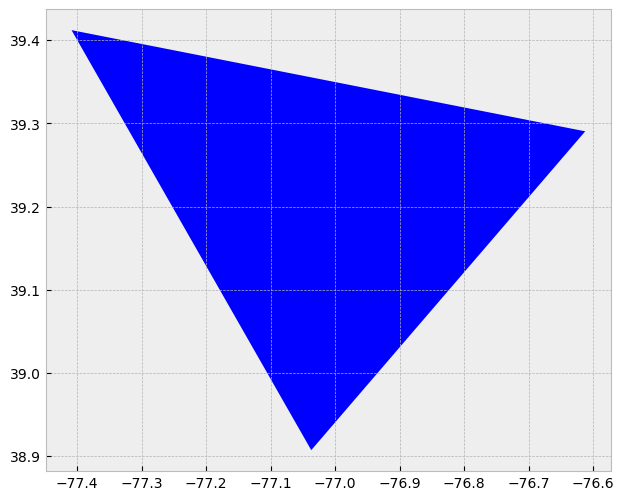

In [4]:
from shapely.geometry import Polygon

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.show()

(c_raster_data_intro)=

### Raster Data
Raster data models use a grid of cells, also known as pixels, to represent real-world objects. These data models are often used to represent and manage a variety of entities such as imagery, surface temperatures, digital elevation models, and more.

You can think of a raster as a specific instance of an area object, divided into a regular grid of cells. A more fitting analogy, perhaps, would be to compare rasters to a regularly spaced [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) of marked points, as rasters are usually stored as an array of values in most GIS environments. Each cell within this array is defined by a unique pair of coordinates.

A crucial feature of raster data models is that each cell or pixel has an associated value. This stands in contrast to vector models where the geometric primitive may or may not have an associated value.

The following Python code generates a 2D array of random integers and displays it as an image using matplotlib:

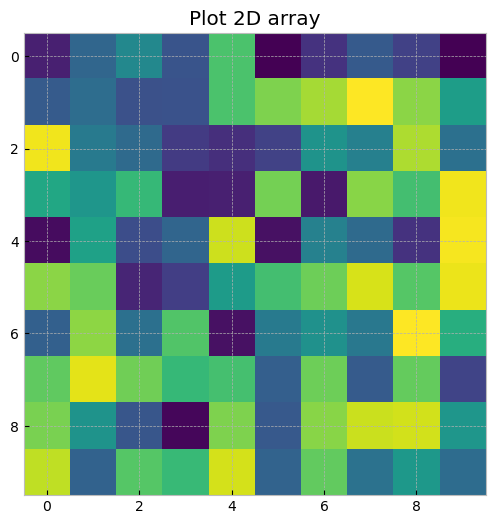

In [5]:
import numpy as np

X=np.random.randint(256, size=(10, 10))

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.show()

For a more practical example, we can use the library rasterio to handle geospatial raster data. Rasterio reads and writes geospatial raster datasets, making it an essential tool for raster analysis. The following code reads a raster dataset and then plots it:

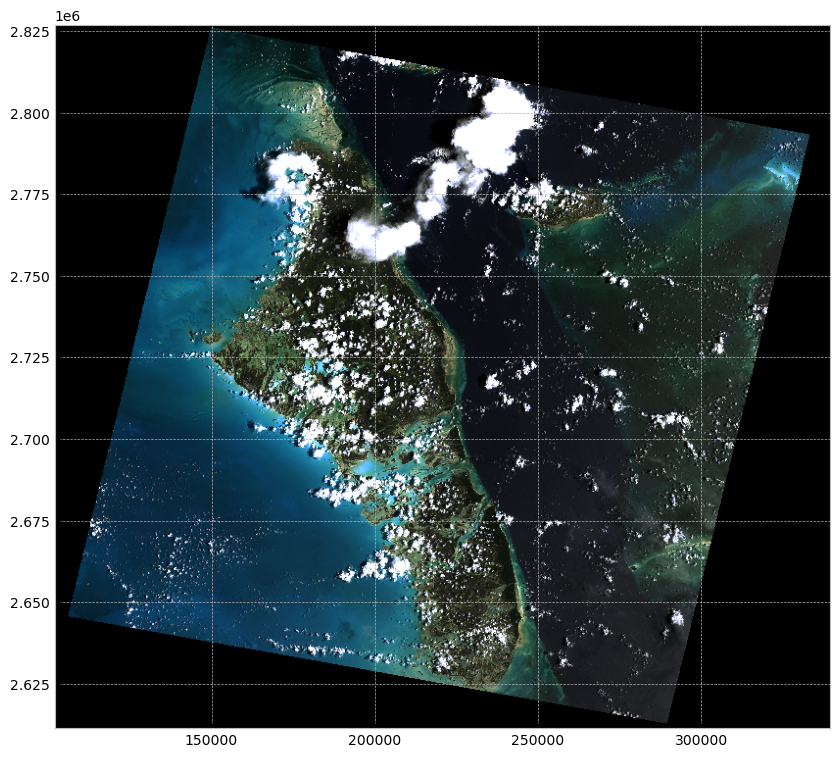

In [6]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open a web location with a demo raster dataset
url = 'https://github.com/rasterio/rasterio/raw/main/tests/data/RGB.byte.tif'
with rasterio.open(url) as src:
    fig, ax = plt.subplots(figsize=(10,10))
    show(src.read(), ax=ax, transform=src.transform)
    plt.show()


This code opens a connection to the demo raster dataset's URL, reads it into a Rasterio Dataset object, and then plots it. The dataset is an RGB GeoTIFF, which is a common format for geospatial raster data. It's important to use a context manager (`with` statement) when opening files with Rasterio to ensure they're properly closed after use.

### Object vs. Field

The conventional raster/vector representation of our world has primarily been shaped by software and data storage contexts. However, this approach may not always offer meaningful insights when analyzing patterns, as it can sometimes obscure crucial characteristics of the subject under study. A more illuminating approach can be to consider object versus field perspectives, even though they may appear more abstract at first glance.

#### Object View

An object perspective perceives entities as discrete objects, which do not necessarily occur at every location within a study area. For instance, point locations of cities or polygonal representations of urban areas (which may be non-contiguous) serve as examples of an object view. In this perspective, individual items or regions are treated as unique entities.

Objects are typically stored as vector data - points, lines, polygons. 

#### Field View

In contrast, a field perspective treats entities as a scalar field—a mathematical concept where a scalar represents a measurable quantity at every location within the study region. Surface elevation and temperature are common examples of scalar fields, as they reflect a property that can be measured at any point.

For instance, consider the presence or absence of a building. This can be represented as a binary scalar field: a value of 0 for locations without buildings and a value of 1 for locations with one or more buildings. Although it may seem counterintuitive to view buildings as a field—especially given the definition of the object view—buildings can actually be represented from both perspectives. The choice between an object or field view ultimately depends on the context of the analysis. If the focus is on studying the distribution of buildings across an area, an object view is suitable. However, if the aim is to identify all locations without buildings, a binary field perspective becomes more relevant.


Fields are typically stored as raster data. 

### Scale
The method for representing real-world entities in a GIS is often significantly influenced by the **scale** of the analysis. In a GIS context, scale refers to the ratio of a distance on the map to the corresponding distance in the real world. Therefore, a **large-scale** map indicates a large ratio and typically covers a small geographic extent. This definition might seem counterintuitive because, in everyday language, 'large scale' is often interpreted as referring to a broad scope or extensive area.

The two maps below illustrate this concept by representing the same area—Boston—but at different scales. When the scale is small (e.g., 1:10,000,000), representing Boston and other cities as points can be an effective approach. Conversely, when the scale is large (e.g., 1:34,000), it might be more suitable to represent Boston as a polygon. Furthermore, at this larger scale, roads might be better depicted as polygons rather than polylines.

```{figure} ../_static/img/Boston_small_scale.jpg
:name: Boston small scale
:alt: Small scale map of Boston

Map of the Boston area at a 1:10,000,000 scale. In geographical terms, this is considered a small scale, although in common parlance, the extensive area it covers would often be referred to as 'large scale.'
```

```{figure} ../_static/img/Boston_large_scale.jpg
:name: Boston large scale
:alt: Large scale map of Boston

Map of the Boston area at a 1:34,000 scale. In geographical terms, this is considered a large scale, although in common parlance, the limited area it covers would often be referred to as 'small scale.'
```
 
### Attribute Tables

In a Geographic Information System (GIS), non-spatial data linked to a spatial feature are known as **attributes**. A spatial feature on a GIS map corresponds to a record in the attribute table, connected by a unique numerical feature identifier (FID). Every feature in a layer possesses an identifier. Understanding the one-to-one or many-to-one relationship between the feature and its attribute record is crucial. Due to this linkage, many GIS software allow you to click on a map feature and display its associated attributes from the table.

Raster data can also contain attributes, but only if the pixels are represented by a unique set of integer values. Raster datasets with attribute tables typically have cell values that define a category or membership. However, it's important to note that not all GIS raster data formats can store attribute information; in fact, many raster datasets used in GIS work may not have attribute tables.

#### Measurement Levels

Attributes can be categorized into four **measurement levels**:

* **Nominal** data are non-numeric and have no implied order or size (e.g., types of roads like paved and unpaved). 

* **Ordinal** data have an inherent order (e.g., rank-based scores), but the magnitude of the difference is not quantifiable as they lack a linear scale.

* **Interval** data are numeric with a linear scale but lack a true zero. Thus, they can't measure relative magnitudes. For instance, you can't say that 60°F is twice as warm as 30°F because these temperatures correspond to different values in Celsius.

* **Ratio** scale data, like interval data, also have a linear scale but with a true zero. This makes them suitable for representing relative magnitudes (e.g., monetary values like $1, $20, $100).

### Data Type

Attributes can also be categorized by their **data type**. ArcGIS supports several data types, including **integer, float, double, and text**. The type of data and its measurement level should inform its storage format in a GIS environment. The following table outlines common data types supported by most GIS applications:

| Type | Stored values | Note |
| ----- | ------------------------------------------ | ----- |
| Short integer | -32,768 to 32,768 | Whole numbers |
| Long integer | -2,147,483,648 to 2,147,483,648 | Whole numbers |
| Float | -3.4 * E-38 to 1.2 E38 | Real numbers |
| Double | -2.2 * E-308 to 1.8 * E308 | Real numbers |
| Text | Up to 64,000 characters | Letters and words |

While it's possible to store whole numbers as a float or double, doing so increases storage space, which can impact performance for large datasets. Furthermore, storing a float as an integer could lead to significant data loss, as the system would round off decimal numbers to the nearest whole number. For example, the float values 0.2, 0.01, 0.34, 0.1, and 0.876 would be converted to 0, 0, 0, 0, and 1 as integers.